In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("laptopPrice.csv")
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])

df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,0,34649,1,3,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,38999,2,65,5
2,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,39999,2,8,1
3,1,1,2,0,3,1,6,0,2,0,1,0,3,0,0,69990,2,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,0,0,26990,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1,0,10,7,2,1,1,0,2,1,0,0,0,0,0,135990,2,0,0
819,1,0,10,7,2,1,1,0,2,1,0,0,0,0,0,144990,2,0,0
820,1,0,10,7,2,1,1,0,2,1,2,0,0,0,0,149990,2,0,0
821,1,0,10,7,2,1,1,0,2,1,2,0,0,0,0,142990,2,0,0


In [5]:
x=df.drop("Price",axis=1)
y=df["Price"]
y

0       34649
1       38999
2       39999
3       69990
4       26990
        ...  
818    135990
819    144990
820    149990
821    142990
822     57490
Name: Price, Length: 823, dtype: int64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
model=RandomForestRegressor(n_estimators=50)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [8]:
y_pred=model.predict(x_test)
y_pred

array([102852.        ,  39500.36      ,  39251.7       ,  40700.16      ,
        70517.12      ,  72132.088     , 141790.        ,  38226.79047619,
        55385.64      ,  55358.02      , 154893.95333333,  62726.        ,
        79807.22      ,  59656.58      ,  60875.74      ,  49448.58      ,
        42471.45333333,  64040.68666667,  53867.        ,  83240.14      ,
        85083.06      ,  64824.82      ,  78622.4       ,  54555.46      ,
        80982.48      ,  66661.6       ,  66056.65833333,  64422.504     ,
        39436.        ,  41106.8       ,  71710.36      ,  79262.06333333,
        64750.34      ,  43092.31333333,  63980.98      , 148136.        ,
        54857.6       ,  41420.56      ,  86255.7       ,  37081.68      ,
        62938.36      ,  45875.78      ,  66168.664     , 125906.835     ,
        58158.88      ,  39311.44      ,  64672.104     ,  51372.58      ,
        37623.24      ,  92217.82      , 145180.10166667, 139884.68      ,
        68384.428     ,  

In [9]:
msc=mean_squared_error(y_pred,y_test)
print(msc)
rmsc=np.sqrt(msc)
print(rmsc)

698118170.519497
26421.925942661655


In [10]:
score=r2_score(y_pred,y_test)
score

0.3728366871006843

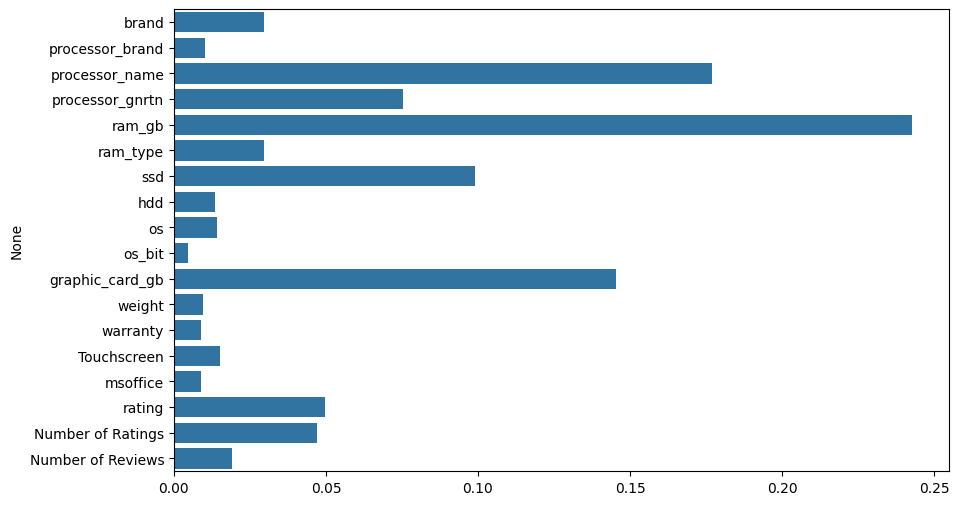

In [11]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()